# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)


Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型 ( 使用 functinal API )

In [15]:
from keras.models import Sequential, Model
from keras.layers import Dense ,Input

In [10]:
# 定義輸入
main_input = Input(shape = (784,), name = 'main_input')

In [12]:
# 隱藏層 x 2 
dense = Dense(units = 256, kernel_initializer = 'normal', activation = 'relu')(main_input)
dense = Dense(units = 256, kernel_initializer = 'normal', activation = 'relu')(dense)

In [13]:
# 輸出層
main_output = Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax')(dense)

In [16]:
# 定義模型
model = Model(inputs = main_input, outputs = main_output)

In [17]:
# 檢視模型架構
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 390us/step - loss: 0.2390 - accuracy: 0.9291 - val_loss: 0.1136 - val_accuracy: 0.9650
Epoch 2/10
48000/48000 [==============================] - 18s 383us/step - loss: 0.0928 - accuracy: 0.9716 - val_loss: 0.1027 - val_accuracy: 0.9693
Epoch 3/10
48000/48000 [==============================] - 18s 381us/step - loss: 0.0632 - accuracy: 0.9797 - val_loss: 0.0959 - val_accuracy: 0.9731
Epoch 4/10
48000/48000 [==============================] - 18s 383us/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0837 - val_accuracy: 0.9758
Epoch 5/10
48000/48000 [==============================] - 18s 383us/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0947 - val_accuracy: 0.9717
Epoch 6/10
48000/48000 [==============================] - 19s 398us/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0991 - val_accuracy: 0.9746
Epoch 7/10
48000/48000 [==============================] 

In [23]:
train_history.history

{'val_loss': [0.11356111488180856,
  0.10266859523237994,
  0.0958583994959093,
  0.08371261250941704,
  0.09466348108556122,
  0.09905700242232221,
  0.1155506635925849,
  0.10547490798121847,
  0.12694721307651466,
  0.1475438065560183],
 'val_accuracy': [0.9649999737739563,
  0.9692500233650208,
  0.9730833172798157,
  0.9757500290870667,
  0.971666693687439,
  0.9745833277702332,
  0.9738333225250244,
  0.9761666655540466,
  0.971750020980835,
  0.9682499766349792],
 'loss': [0.23899884587929895,
  0.09279624720360152,
  0.06320105627041388,
  0.046694154318848935,
  0.03639718458801993,
  0.02883169470495098,
  0.025245484191935855,
  0.019910096953629667,
  0.01993364689348452,
  0.016781446635711898],
 'accuracy': [0.9290625,
  0.971625,
  0.97975,
  0.9847917,
  0.98808336,
  0.9904792,
  0.9915208,
  0.99366665,
  0.99310416,
  0.9944375]}

# 以圖形顯示訓練過程

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
show_train_history(train_history,'acc','val_acc')

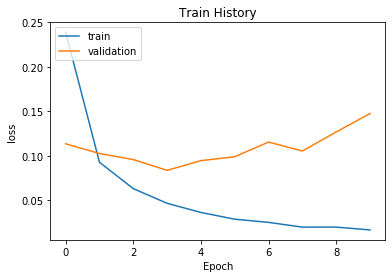

In [21]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [22]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 118us/step

accuracy= 0.9729999899864197
